# 텍스트 마이닝 2

## 2019-12-20

## 김도형

## 목차

* 감성 분석
* 분류 문제
* 클러스터링
* 토픽 모델링
* 워드 임베딩

## 필수 임포트 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## 필요 패키지

* KoNLPy
* Scikit-Learn
* Gensim
* pyLDAvis


## 감성 분석

* 감성 분석 (Sentiment Analysis)

    * 어떤 문서에 대해 좋다(positive) 혹은 나쁘다(negative)는 평가를 내리는 것
    * 영화 감상평
    * 상품 평가
    * 뉴스와 주가의 상관관계 평가

## 분류 문제

* 분류 (Classification) 문제

  * 입력변수(독립변수) $X$의 데이터 값을 받아서
  * 출력변수(종속변수) $Y$의 범주를 예측
  
  
* 감성 분석은

  * 좋다 ($Y=1$)
  * 나쁘다 ($Y=0$)
  * 의 두가지 범주를 예측하는 이진 분류 

## 분류 성능 평가

* 분류 결과표
* 정확도
* 정밀도
* 재현율
* 위양성율
* F-점수

## 이진 분류결과표 

클래스가 0과 1 두 종류 밖에 없는 이진 분류의 경우에는 일반적으로 클래스 이름을 양성(Positive)와 음성(Negative)로 표시한다. 이 때의 결과를 나타내는 이진 분류결과표(Binary Confusion Matrix)결과표는 다음과 같다.

| <span/> | 양성이라고 예측  | 음성이라고 예측 | 
|-|-|-|
| 실제 양성 | 양성 예측이 맞음 (True Positive)   |  음성 예측이 틀림 (False Negative) |             
| 실제 음성 | 양성 예측이 틀림 (False Positive)  |  음성 예측이 맞음 (True Negative)   |   

분류 모형의 예측 결과가 맞은 경우, 즉 양성을 양성이라고 예측하거나 음성을 음성이라고 예측한 경우에는 참(True)라고 하고 예측 결과가 틀린 경우, 즉 양성을 음성이라고 예측하거나 음성을 양성이라고 예측한 경우에는 거짓(False)이라고 한다.


## 이진 분류의 예 1: 제품 검사

제품을 생산하는 제조공장에서는 완성된 제품에 대해 품질 테스트를 실시하여 불량품을 찾아내고 찾아낸 불량품은 공장으로 되돌린다(리콜, recall). 이 때 품질 테스트 결과가 양성이면 불량품이라고 예측한 것이고 음성이고 정상제품이라고 예측한 것이다.

* True Positive: 불량품을 불량품이라고 정확하게 예측
* True Negative: 정상제품을 정상제품이라고 정확하게 예측
* False Positive: 불량품을 정상제품이라고 잘못 예측
* False Negative: 정상제품을 불량품이라고 잘못 예측

|    <span />                | 불량품이라고 예측                | 정상제품이라고 예측                         | 
|--------------------|------------------------|---------------------------------|
| 실제로 불량품    | True Positive            |  False Negative                   |             
| 실제로 정상제품  | False Positive            |  True Negative                    |   

## 이진 분류의 예 2: 암 검진

암(cancer, 악성종양)을 검진할 때도 암에 걸린 것을 양성(陽性, positive)이라하고 걸리지 않은 것을 음성이라고 한다. 종양(tumar)의 양성(良性, benign), 악성(惡性, malignant) 용어와 다르다는 점에 주의하라.

* True Positive: 암을 암이라고 정확하게 예측
* True Negative: 암이 아닌것을 암이 아니라고 정확하게 예측
* False Positive: 암을 암이 아니라고 잘못 예측
* False Negative: 암이 아닌것을 암이라고 잘못 예측

|   <span/>                  | 암이라고 예측                | 암이 아니라고 예측                         | 
|--------------------|------------------------|---------------------------------|
| 실제로 암   | True Positive            |  False Negative                   |             
| 실제로 암이 아님  | False Positive            |  True Negative                    |   

## 이진 분류의 예 3: FDS

FDS(Fraud Detection System)는 금융 거래, 회계 장부 등에서 잘못된 거래, 사기거래를 찾아내는 시스템을 말한다. FDS의 예측 결과가 양성이면  사기거래라고 예측한 것이고 음성이면 정상거래라고 예측한 것이다. 

* True Positive: 사기를 사기라고 정확하게 예측
* True Negative: 정상을 정상이라고 정확하게 예측
* False Positive: 정상을 사기라고 잘못 예측
* False Negative: 사기를 정상이라고 잘못 예측

|    <span />   | 사기라고 예측                | 정상이라고 예측                         | 
|---------------|------------------------|---------------------------------|
| 실제로 사기  | True Positive            |  False Negative                   |             
| 실제로 정상  | False Positive            |  True Negative                    |   

## 정확도 (Accuracy)

정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.
 
$$ \text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN} $$

## 정밀도 (Precision)

정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 된다.
 
$$\text{precision} = \dfrac{TP}{TP + FP}$$

## 재현율 (Recall)

재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다.
 
$$\text{recall} = \dfrac{TP}{TP + FN}$$

## 위양성율 (Fall-out)

위양성율(fall-out)은 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율을 말한다. 다른 평가점수와 달리 낮을수록 좋은 모형이다. FDS의 경우에는 실제로는 정상 거래인데 FDS가 사기 거래라고 예측한 거래의 비율이 된다. FPR(false positive rate)또는 1에서 위양성률의 값을 뺀 값을 특이도(specificity)라고도 한다. 

$$\text{fallout} = \dfrac{FP}{FP + TN}$$

## F-점수 (F Score)

정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$

베타가 1인 경우를 특별히 F1점수라고 한다.

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

## 분류 모형의 종류

* 분류 모형

 * 분류 문제를 풀기위한 방법론


* 확률적 (probabilistic) 분류 모형

 * 주어진 데이터에 대해(conditionally) 각 카테고리 혹은 클래스가 정답일 조건부확률(conditional probability)를 계산
 
 
* 판별적 (discriminative) 분류 모형

 * 주어진 데이터를 카테고리에 따라 서로 다른 영역으로 나누는 경계면(decision boundary)을 찾아낸 다음 이 경계면으로부터 주어진 데이터가 어느 위치에 있는지를 계산

| 모형 | 방법론 | 
|-|-|
| LDA/QDA  | 확률적 생성모형 |
| 나이브 베이지안 | 확률적 생성모형 |
| 로지스틱 회귀 | 확률적 판별모형 |
| 의사결정나무 | 확률적 판별모형 |
| 퍼셉트론 | 판별함수 모형 |
| 서포트벡터머신 | 판별함수 모형 |
| 인공신경망 | 판별함수 모형 |

## 확률적 분류 모형

* 출력변수 $y$가 $K$개의 클래스 $1, \cdots, K$ 중의 하나의 값을 가진다고 가정.

* 확률적 모형은 다음과 같은 순서로 $x$에 대한 클래스를 예측

(1) 입력 $x$가 주어졌을 때 $y$가 클래스 $k$가 될 확률 $P(y=k \mid x )$을 모두 계산

$$
\begin{eqnarray}
P_1 &=& P(y=1 \mid x ) \\
\vdots & & \vdots \\
P_K &=& P(y=K \mid x )\\
\end{eqnarray}
$$

(2) 이 중에서 가장 확률이 큰 클래스를 선택

$$ \hat{y} = \arg\max_{k} P(y=k \mid x ) $$


<img src="https://datascienceschool.net/upfiles/9fa17cb593a04f86b1ecd8a27c4764d8.png" />

<img src="https://datascienceschool.net/upfiles/713ca4d856e24ede9a4a701527784207.png" />

<img src="https://datascienceschool.net/upfiles/5e272f625de947fa8ed7286b98486d27.png" />

## 나이브 베이즈 분류 모형

* 나이즈베이즈 분류모형(Naive Bayes classification model)

  * 모든 개별 독립변수가 서로 조건부독립(conditional independent)이라는 가정
  * 나이브 가정(naive assumption)
  * $x$의 결합확률분포함수는 개별 스칼라 원소 $x_d$의 확률분포함수의 곱이 된다.

$$
P(x_1, \ldots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y = k)
$$

스칼라 원소 $x_d$의 확률분포함수는 결합확률분포함수보다 추정하기 훨씬 쉽다

가능도함수를 추정한 후에는 베이즈정리를 사용하여 조건부확률을 계산할 수 있다.

$$
\begin{align}
P(y = k \mid x) 
&= \dfrac{ P(x_1, \ldots, x_D \mid y = k) P(y = k) }{P(x)} \\
&= \dfrac{ \left( \prod_{d=1}^D P(x_{d} \mid y = k) \right) P(y = k) }{P(x)}
\end{align}
$$


## 다항분포 나이브 베이즈 분류 모형

* $x$ 벡터가 다항분포의 표본이라고 가정
* 즉, $D$개의 면을 가지는 주사위를 $\sum_{d=1}^D x_d$번 던져서 나온 결과로 본다.

예를 들어 $x$가 다음과 같다면,

$$ x = (1, 4, 0, 5) $$

4면체 주사위를 10번 던져서 1인 면이 1번, 2인 면이 4번, 4인 면이 5번 나온 결과로 해석한다.

각 클래스마다 주사위가 다르다고 가정하므로 $K$개의 클래스를 구분하는 문제에서는 $D$개의 면을 가진 주사위가$K$개 있다고 본다. 

$$ 
P(x_1, \ldots, x_D \mid y = k) 
\;\; \propto \;\; \prod_{d=1}^D \mu_{d,k}^{x_{d,k}} 
$$

$$ \sum_{d=1}^{D} \mu_{d,k} = 1 $$

따라서 다항분포 가능도 모형을 기반으로 하는 나이브베이즈 모형은 주사위를 던진 결과로부터  $1,\ldots,K$ 중 어느 주사위를 던졌는지를 찾아내는 모형이라고 할 수 있다.

* 다항분포 나이브 베이즈 분류 모형은 BOW 인코딩 된 문서의 분류에 적합

 * 문서 => BOW 인코딩 => X 벡터의 분포 => 주사위를 던진 결과
 * 문서의 종류 => 주사위의 종류

### Scikit-Learn을 사용한 분류

* `MultinomialNB` 다항분포 나이브베이즈 클래스 사용
* BOW 인코더를 파이프라인(pipeline)으로 연결하여 사용

## 실습 1: 네이버 영화평 감성 분석

### step 1: 텍스트 데이터 다운로드

In [2]:
!rm -f ratings_train.txt ratings_test.txt
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

--2019-12-20 11:05:47--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  2.86MB/s    in 4.5s    

2019-12-20 11:05:53 (3.11 MB/s) - ‘ratings_train.txt’ saved [14628807/14628807]

--2019-12-20 11:05:53--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (4.7M) [text/plain]
Saving to: ‘ratings_test.txt’

ratings_test.txt    100%[===================>]   4.6

### step 2: 텍스트 데이터 로드

In [3]:
import codecs

with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   # header 제외

In [4]:
print(data[0])

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']


### step 3: 입출력 데이터 생성

In [5]:
X = list(zip(*data))[1]
y = np.array(list(zip(*data))[2], dtype=int)

### step 4: 분류 모형 객체 생성

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('mb', MultinomialNB()),
])

### step 5: 학습

In [7]:
%%time
model1.fit(X, y)

CPU times: user 3.01 s, sys: 140 ms, total: 3.15 s
Wall time: 3.18 s


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### step 6: 성능 평가

In [8]:
with codecs.open("ratings_test.txt", encoding='utf-8') as f:
    data_test = [line.split('\t') for line in f.read().splitlines()]
    data_test = data_test[1:]   # header 제외

X_test = list(zip(*data_test))[1]
y_test = np.array(list(zip(*data_test))[2], dtype=int)

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     24827
           1       0.84      0.81      0.82     25173

    accuracy                           0.83     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.83      0.83      0.83     50000



In [30]:
model1.predict(["안 좋아"])

array([1])

### step 7: 성능 개선

* 한글 형태소 분석기
* (1-2) N-그램 사용
* TF-IDF 사용

In [31]:
from konlpy.tag import Okt

pos_tagger = Okt()

def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc)]

In [32]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

model2 = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1, 2))),
    ('mb', MultinomialNB()),
])

model2.fit(X, y)

CPU times: user 3min 57s, sys: 8.46 s, total: 4min 6s
Wall time: 3min 53s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize_pos at 0x7fcae4b21950>,
                                 use_idf=True, vocabulary=None)),
                ('mb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [33]:
%%time
print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     24827
           1       0.87      0.86      0.87     25173

    accuracy                           0.87     50000
   macro avg       0.87      0.87      0.87     50000
weighted avg       0.87      0.87      0.87     50000

CPU times: user 1min 16s, sys: 1.78 s, total: 1min 17s
Wall time: 1min 16s


In [61]:
model1.predict(["python"])

array([0])

In [62]:
model2.predict(["python"])

array([0])

## 클러스터링

* 클러스터링(clustering) 

  * 주어진 데이터 집합을 유사한 데이터들의 그룹으로 나누는 것.
  * 나누어진 유사한 데이터의 그룹을 클러스터(cluster)라 한다.


* 클러스터링은 예측(prediction) 문제와 달리 특정한 독립변수와 종속변수의 구분도 없고 학습을 위한 목푯값(target value)도 필요로 하지 않는 비지도학습(unsupervised learning)의 일종이다.

## 문서 클러스터링

* 문서 집합을 비슷한 문서끼리 묶는 작업

  * BOW 인코딩 결과를 사용
  * 비슷한 단어를 사용한 문서끼리 묶음

## 클러스터링 방법

* 예측모형과 달리 다만 목표함수가 명확히 주어지지 않았기 때문에  다양한 클러스터링 방법이 존재한다. 

  * K-means
  * DBSCAN
  * Spectral Clustering
  * Affinity Propagation
  * 계층적 클러스터링(Hierarchical Clustering)

<img src="https://datascienceschool.net/upfiles/80b35e0d0c284fdbbea8557d8a8ee77f.png" />

## K-Means 클러스터링

* 가장 단순하고 빠른 클러스터링 알고리즘
* 다음과 같은 목적함수 값이 최소화될 때까지 
* 클러스터의 중심(centroid) 위치와 각 데이터가 소속될 클러스터를 반복해서 찾는다. 


$$ J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)  $$


<img src="https://datascienceschool.net/upfiles/6548eaf48b2147d89c5f03e7acd7e82d.png" />

## Scikit-Learn K-Means 사용법

scikit-learn의 cluster 서브패키지는 KMeans 클러스터링을 위한 `KMeans` 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

* `n_clusters`: 클러스터의 갯수
* `init`: 초기화 방법. `"random"`이면 무작위, `"k-means++"`이면 K-Means++ 방법. 또는 각 데이터의 클러스터 라벨. 
* `n_init`: 초기 중심값 시도 횟수. 디폴트는 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택한다.
* `max_iter`: 최대 반복 횟수.
* `random_state`: 시드값.


## 클러스터링 성능기준

* 정답을 알고있는 경우
  * Adjusted Rand Index
  * Adjusted Mutual Information



* 정답을 모르는 경우
  * Silhouette Coefficient

## Adjusted Rand Index

* contingency table

  * 정답과 클러스터링 결과에서 각각 같은 클러스터에 속하는 데이터의 갯수를 나타낸 것이다.

정답은 

$$ T=\{T_1, T_2,\ldots, T_r\} $$

의 $r$개의 클러스터이고 클러스터링 결과는

$$ C=\{C_1, C_2,\ldots, C_s\} $$

의 $s$개의 클러스터라고 가정한다.



$$
\begin{array}{c|cccc|c}
T \; \backslash \; C &
C_1&
C_2&
\ldots&
C_s&
\text{소계}
\\
\hline
T_1&
n_{11}&
n_{12}&
\ldots&
n_{1s}&
a_1
\\
T_2&
n_{21}&
n_{22}&
\ldots&
n_{2s}&
a_2
\\
\vdots&
\vdots&
\vdots&
\ddots&
\vdots&
\vdots
\\
T_r&
n_{r1}&
n_{r2}&
\ldots&
n_{rs}&
a_r
\\
\hline
\text{소계}&
b_1&
b_2&
\ldots&
b_s&
\end{array}
$$


* $n_{ij}$: 정답에서는 클러스터 $T_i$에 속하고 클러스터링 결과에서는 클러스터 $C_j$에 속하는 데이터의 수
* $a_i = \sum_{j=1}^s n_{ij}$
* $b_j = \sum_{i=1}^r n_{ij}$


$$
\text{ARI} = \frac{ \overbrace{\sum_{ij} \binom{n_{ij}}{2}}^\text{Index} - \overbrace{[\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}^\text{기댓값} }{ \underbrace{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}]}_\text{최댓값} - \underbrace{[\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}_\text{기댓값} }
$$

## Adjusted Mutual Information

전체 데이터의 갯수를 $N$이라고 하면 이산확률변수 $T$의 분포는

$$ P(i)=\frac{|T_i|}{N} $$

로 추정할 수 있다. 이 식에서 $|T_i|$는 클러스터 $T_i$에 속하는 데이터의 갯수를 나타낸다.

비슷하게 이산확률변수 $C$의 분포는

$$ P'(j)=\frac{|C_i|}{N} $$

라고 추정하고 $T$와 $C$의 결합확률분포는

$$ P(i,j)=\frac{|T_i \cap C_j|}{N} $$

라고 추정한다. 여기에서 $|T_i \cap C_j|$는 클러스터 $T_i$에도 속하고 클러스터 $C_j$에도 속하는 데이터의 갯수를 나타낸다.

확률변수 $T, C$의 mutual information은 

$$ MI(T,C)=\sum_{i=1}^r \sum_{j=1}^s P(i,j)\log \frac{P(i,j)}{P(i)P'(j)} $$

로 정의한다.

만약 두 확률변수가 서로 독립이면 mutual information의 값은 0이며 이 값이 mutual information이 가질 수 있는 최소값이다. 두 확률변수가 의존성이 강할수록 mutual information는 증가한다. 또한 클러스터의 갯수가 많아질수록 mutual information이 증가하므로 올바른 비교가 어렵다. 따라서 adjusted Rand index의 경우와 마찬가지로 각 경우에 따른 mutual information 기댓값을 빼서 재조정한 것이 adjusted mutual information이다.

## 실루엣 계수

* 정답 정보가 없다면 어떻게 클러스터링이 잘되었는지 판단할 수 있을까? 
* 실루엣 계수(Silhouette coefficient)는 이러한 경우에 클러스터링의 성능을 판단하기 위한 기준의 하나이다.

우선 모든 데이터 쌍 $(i, j)$에 대해 거리(distance) 혹은 비유사도(dissimilarity)을 구한다. 이 결과를 이용하여 모든 데이터 $i$에 대해 다음 값을 구한다.

* $a_i$ : $i$와 같은 클러스터에 속한 원소들의 평균 거리
* $b_i$ : $i$와 다른 클러스터 중 가장 가까운 클러스터까지의 평균 거리

이 때 데이터  $i$에 대한 실루엣 계수는 

$$ s_i = \dfrac{b_i - a_i}{\max{(a_i, b_i)}} $$

로 정의한다. 전체 데이터의 실루엣 계수를 평균된 값을 평균 실루엣 계수라고 한다.

## 실습 2: 뉴스그룹 클러스터링

### step 1: 텍스트 데이터 다운로드

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset="test",
    categories=["comp.graphics", "rec.sport.baseball", "sci.med"])

In [3]:
print(newsgroups.data[0])

From: justin@sydney.DIALix.oz.au (Justin Sullivan)
Subject: Re: LCD VGA display
Organization: DIALix Services, Sydney, New South Wales, Australia
X-Newsreader: NN version 6.4.19 #1
Lines: 30

In <trevorC6Cz03.x2@netcom.com> trevor@netcom.com (Sandy Santra) writes:

>Mike Mattone (mike@nx03.mik.uky.edu) wrote:

>: I've only had the computer for about 21 months.

>"Only"?!?  That's a long time!

>: Is that a reasonable life
>: cycle for a LCD display?

>I think 21 months with nothing wrong until now is quite reasonable.  If
>you had bought a Compaq or Toshiba, you might have reasonably expected the
>machine to last longer before something went wrong; but that's a moot
>point, perhaps.

Maybe. I've had an Epson portable with backlit LCD since 1988 which is
still used daily and the screen on that is fine. The only problem it
has (and ever has had) is the "arm" of the screen is sorta lose and if
you bend it fairly harshly the screen goes off until you wiggle it
round a bit. But other than t

In [4]:
print(newsgroups.target_names[newsgroups.target[0]])

comp.graphics


### step 2: BOW 인코딩

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words="english")

In [68]:
%%time
X = vect.fit_transform(newsgroups.data)

CPU times: user 310 ms, sys: 0 ns, total: 310 ms
Wall time: 296 ms


In [69]:
X.shape

(1182, 24621)

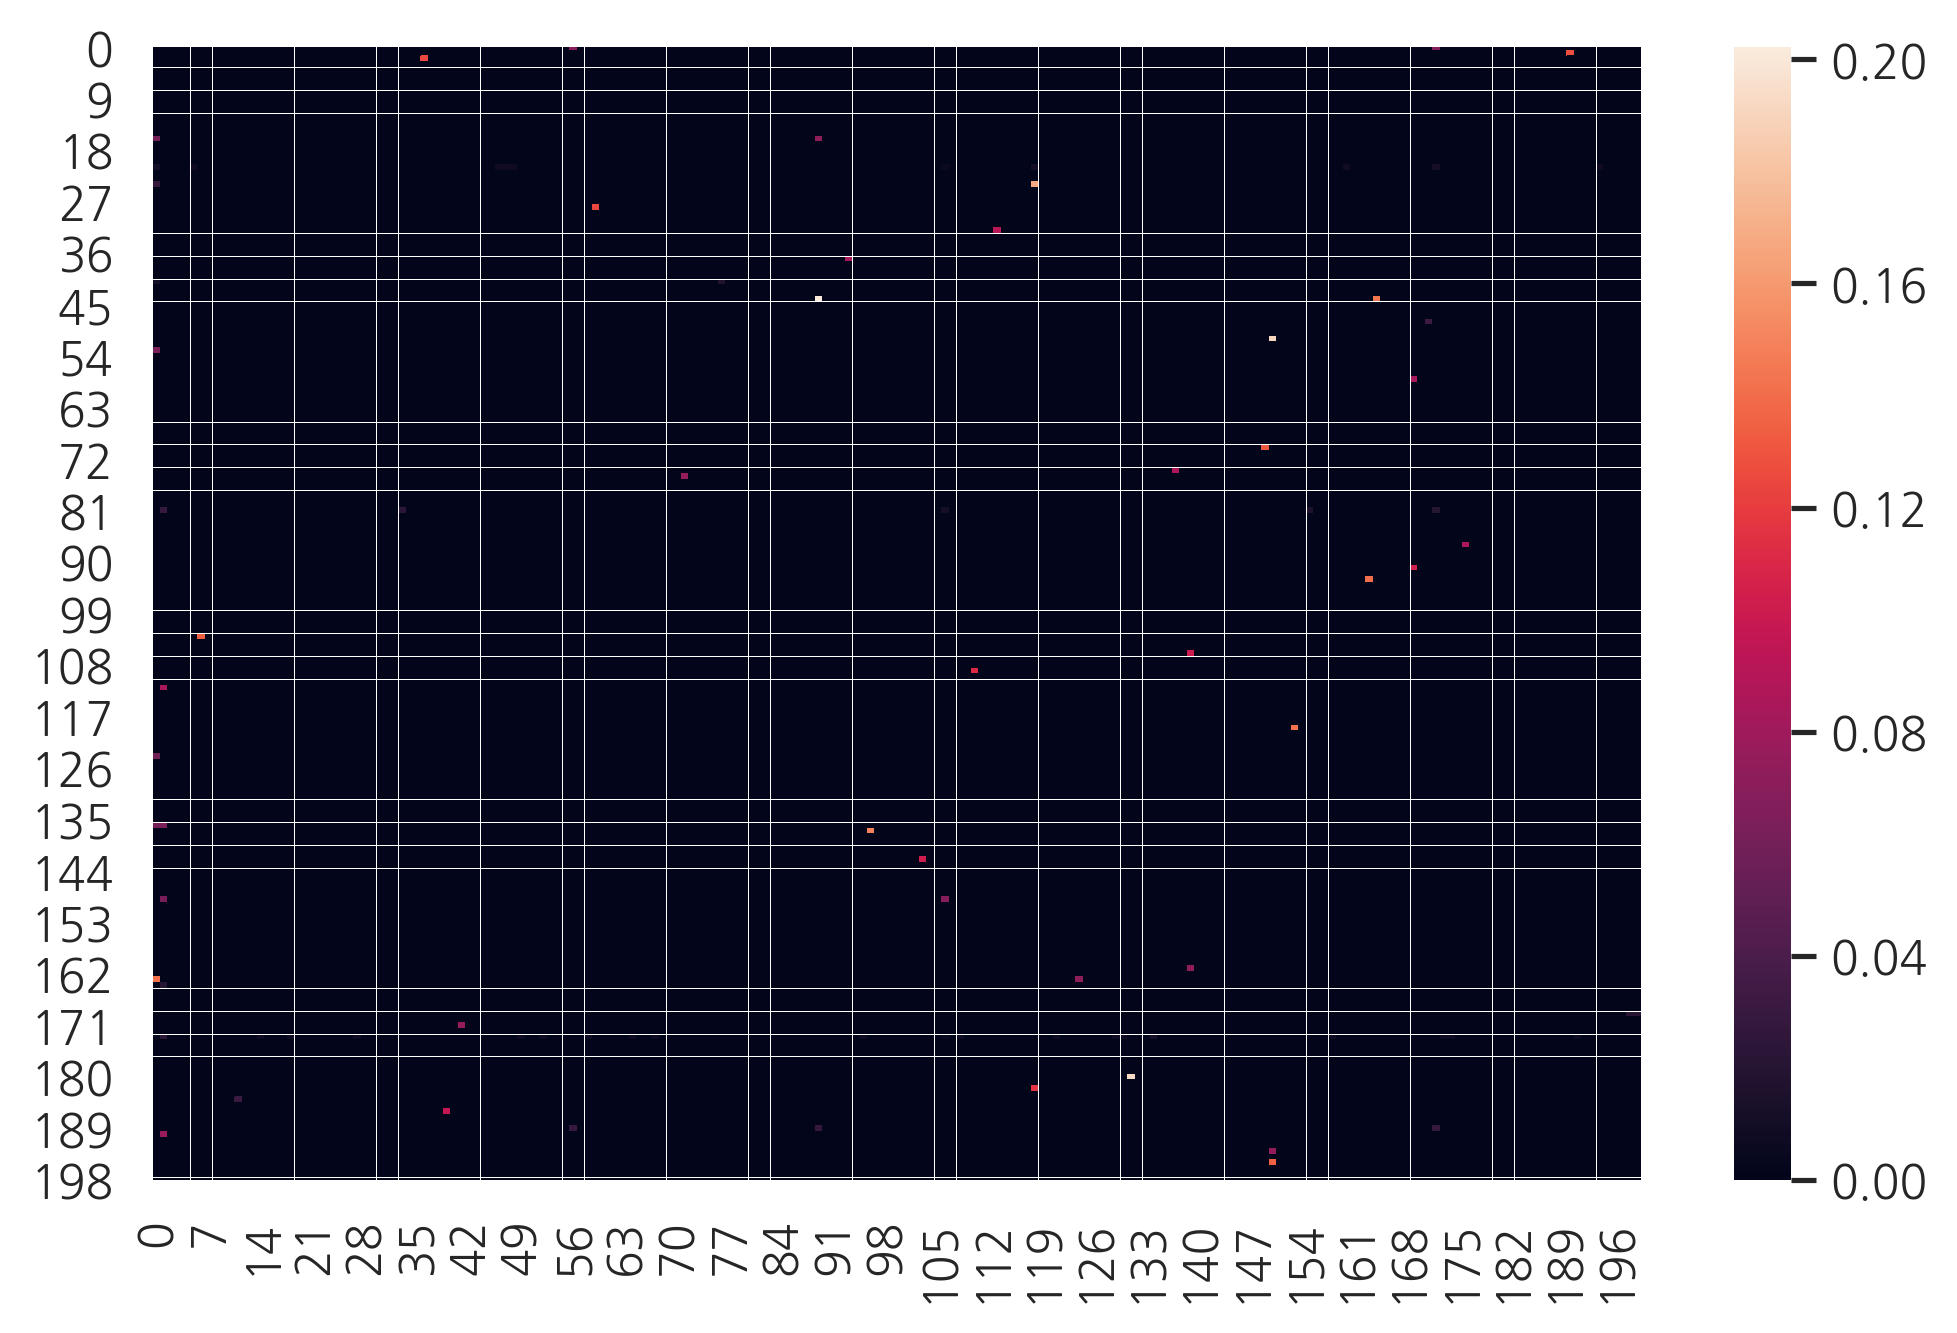

In [79]:
import seaborn as sns
sns.heatmap(X.toarray()[:200, :200], linewidths=0.0001)
plt.show()

### step 3:  시각화

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Y = pca.fit_transform(X.toarray())

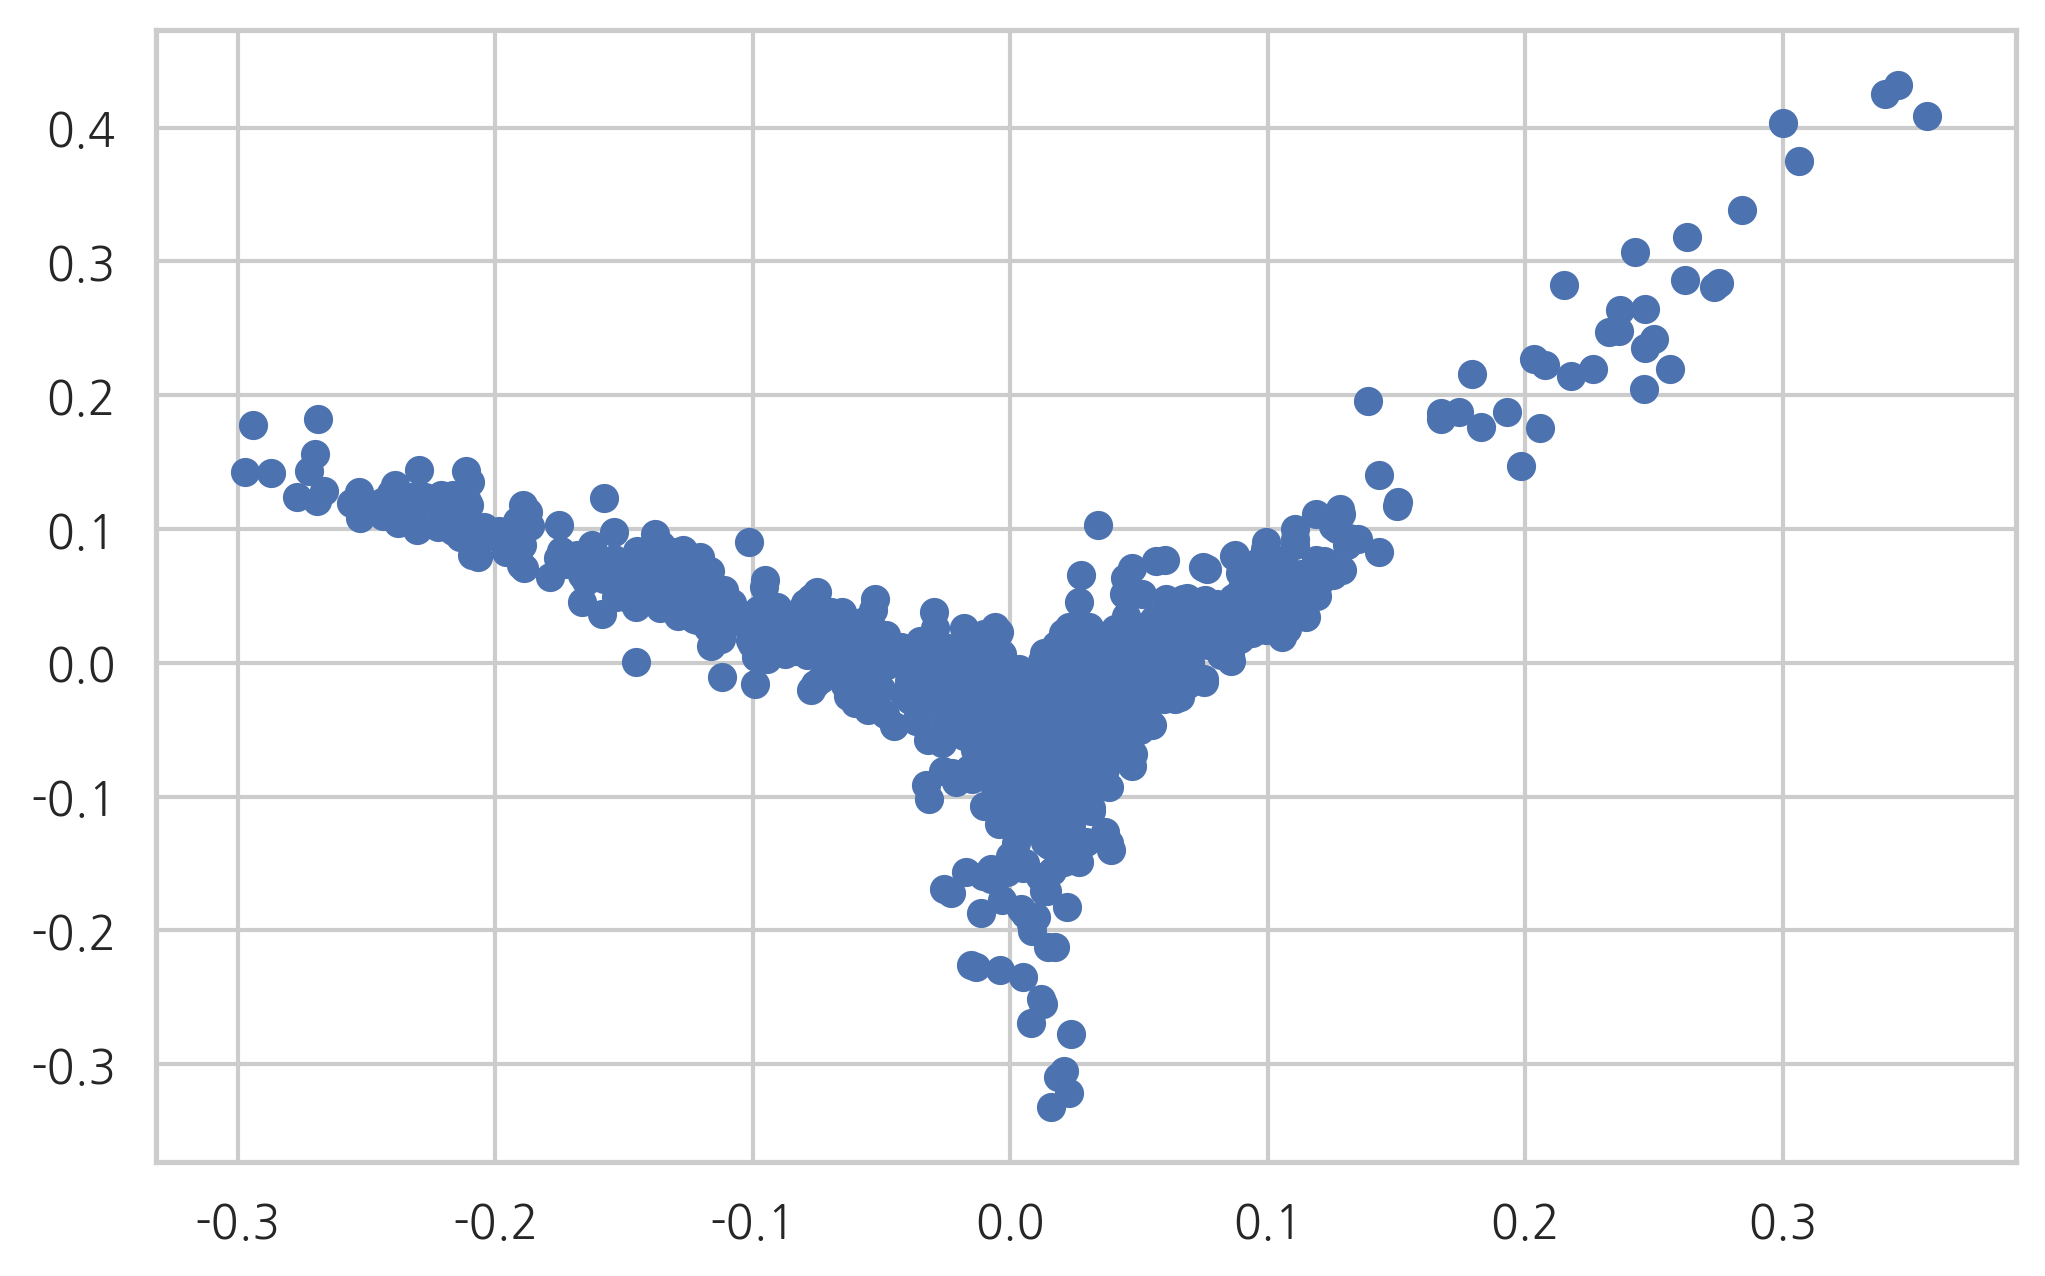

In [19]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

### step 4:  클러스터링

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

In [21]:
%%time
model.fit(X)

CPU times: user 1min 58s, sys: 3.38 s, total: 2min 1s
Wall time: 31.1 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y = model.predict(X)
group1 = np.where(y == 0)[0]
group2 = np.where(y == 1)[0]
group3 = np.where(y == 2)[0]

In [23]:
newsgroups.target[group1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [24]:
from sklearn.metrics.cluster import *

print("ARI:", adjusted_rand_score(newsgroups.target, y))
print("AMI:", adjusted_mutual_info_score(newsgroups.target, y))

ARI: 0.3082350769011828
AMI: 0.41916014694674636


## 단어 임베딩

* 단어 임베딩(Word Embedding)

  * 텍스트를 구성하는 하나의 단어를 수치화하는 방법

## BOW 단어 임베딩

* BOW(Bag of Words)도 단어 임베딩의 일종

 * 단어 => 단어의 인덱스
 * 단어장이 "I", "am", "a", "boy", "girl" 다섯개의 단어로 이루어진 경우 각 단어에 다음과 같이 숫자를 할당한다.

```
"I": 0
"am": 1
"a": 2
"boy": 3 
"girl": 4
```

## Word2Vec

* Word2Vec 단어 임베딩

 * 하나의 단어를 하나의 인덱스 정수가 아니라 실수 벡터로 나타낸다. 
 * 예를 들어 2차원 임베딩을 하는 경우 다음과 같은 숫자 벡터가 될 수 있다.

```
"I": (0.3, 0.2)
"am": (0.1, 0.8)
"a": (0.5, 0.6)
"boy": (0.2, 0.9) 
"girl": (0.4, 0.7)
```

## 신경망 언어 모형 

* 이러한 단어 임베딩은 신경망을 이용하여 언어 모형을 만들려는 시도에서 나왔다. 

* V개의 단어를 가지는 단어장이 있을 때, 단어를 BOW 방식으로 크기 V인 벡터로 만든 다음 다음 그림과 같이 하나의 은닉층(Hidden Layer)을 가지는 신경망을 사용하여 특정 단어 열(word sequence)이 주어졌을 때 다음에 나올 단어를 예측하는 문제를 생각해 보자. 입력과 출력은 모두 BOW 방식으로 인코딩되어 있다.

* 입력 $x$가 들어가면 입력 가중치 행렬 $W$이 곱해져서 은닉층 벡터 $h$가 되는데 $x$가 one-hot-encoding 된 값이므로 $h$ 벡터는 입력 가중치 행렬  $W$의 행 하나에 대응된다. 
<img src="https://datascienceschool.net/upfiles/d0cd427eb0444148853a4bbc3fa2ac8c.png" style="width: 100%;">

## Word2Vec 구현 방법

* CBOW (Continuous Bag of Words) Embedding
* Skip-Gram Embedding

## CBOW (Continuous Bag of Words)

* CBOW (Continuous Bag of Words) 방식

  * 복수 단어 문맥(multi-word context)에 대한 문제 즉, 여러개의 단어를 나열한 뒤 이와 관련된 단어를 추정하는 문제이다. 
  * 즉, 문자에서 나오는 $n$개의 단어 열로부터 다음 단어를 예측하는 문제가 된다.


<img src="https://datascienceschool.net/upfiles/1b6796e90e824dfe82910f0bb3ce47d5.png" style="width: 100%;">

<img src="https://datascienceschool.net/upfiles/e62aadf1e8324d16a66288f2c83c470a.png" style="width: 100%;">

## Skip-Gram Embedding

* Skip-Gram 방식은 CBOW 방식과 반대로 특정한 단어로부터 문맥이 될 수 있는 단어를 예측


<img src="https://datascienceschool.net/upfiles/de649c0d600f410dacf09f71639209ed.png" style="width: 100%;">


## Word2Vec 결과

* 단어의 

  * 사전적 의미
  * 문법적 의미
  * 사회적 의미
  
등을 벡터 값에 포함함

<img src="https://datascienceschool.net/upfiles/df7c2172efdf436b97e9de5ddf47d0de.png"/>

## 벡터의 뺄셈

$$ (a - b) + b = a $$

<img src="https://datascienceschool.net/upfiles/f82a3877a9e546c1a37a303b52b3e7fc.png" />

* (한국 - 서울)

 * 서울에서 한국으로 가는 벡터
 * 수도에서 국가로 변환하는 연산
 
 
* 도쿄 + (한국 - 서울)

 * 수도에서 국가로 변환하는 연산을 도쿄에 적용하면?
 * 일본이 된다

<img src="https://datascienceschool.net/upfiles/b4d24a1123a34e109079a2d228047188.png" />

## 실습 3: Word2Vec 실습

### gensim 패키지 설치

```
pip install gensim
```

### step 1: 학습용 영어 말뭉치 다운로드 

In [80]:
from nltk.corpus import movie_reviews

sentences = [list(s) for s in movie_reviews.sents()]

### step 2: Word2Vec 클래스 객체 생성

In [81]:
%%time
from gensim.models.word2vec import Word2Vec

model = Word2Vec(sentences)

CPU times: user 14.3 s, sys: 460 ms, total: 14.7 s
Wall time: 7.78 s


### step 3: 유사도 계산

In [82]:
model.wv.similarity('actor', 'actress')

0.8892125

In [83]:
model.wv.similarity('he', 'she')

0.8584894

In [84]:
model.wv.similarity('actor', 'she')

0.23523451

In [85]:
model.wv.most_similar("accident")

[('plane', 0.8664605617523193),
 ('prison', 0.866441011428833),
 ('army', 0.8627486824989319),
 ('church', 0.8585507273674011),
 ('truck', 0.853996992111206),
 ('guard', 0.8471652865409851),
 ('victim', 0.8452089428901672),
 ('meeting', 0.8427709341049194),
 ('escapes', 0.8425905704498291),
 ('position', 0.8368675112724304)]

### step 4: 임베딩 벡터 연산

> he + (actress - actor) = she

* (actress - actor): 남성에서 여성으로 가는 벡터
* he + (actress - actor): 남성에서 여성으로 가는 벡터를 he에 적용

In [86]:
model.wv.most_similar(positive=['he', 'actress'], negative='actor', topn=1)

[('she', 0.39657968282699585)]

In [88]:
model.wv.most_similar(positive=['he', 'girl'], negative='boy', topn=1)

[('she', 0.564258873462677)]

In [90]:
model.wv.most_similar(positive=['he', 'miss'], negative='mr', topn=1)

[('she', 0.6337169408798218)]

### step 5: 학습용 한글 말뭉치 다운로드

In [32]:
%%time
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

File ‘ratings_train.txt’ already there; not retrieving.

CPU times: user 460 ms, sys: 30 ms, total: 490 ms
Wall time: 494 ms


### step 6: 인코딩 전처리

In [92]:
import codecs

def read_data(filename):
    with codecs.open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

train_data = read_data('ratings_train.txt')

### step 7: 형태소 분석

In [93]:
from konlpy.tag import Okt
tagger = Okt()

def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

train_docs = [row[1] for row in train_data]

In [94]:
%%time
sentences = [tokenize(d) for d in train_docs]

CPU times: user 6min 12s, sys: 9.71 s, total: 6min 21s
Wall time: 6min 14s


### step 8: Word2Vec 생성 

In [95]:
%%time

model = Word2Vec(sentences)

CPU times: user 20.2 s, sys: 340 ms, total: 20.6 s
Wall time: 10.1 s


### step 9: 유사도 계산

In [96]:
model.wv.similarity(*tokenize(u'배우 여배우'))

0.73392826

In [97]:
model.wv.similarity(*tokenize(u'남자 여자'))

0.92035764

In [98]:
model.wv.similarity(*tokenize(u'배우 여자'))

0.31333023

### step 10: 임베딩 벡터 연산

> 남자 + (여배우 - 배우) = 여자

* (여배우 - 배우): 남성에서 여성으로 가는 벡터
* 남자 + (여배우 - 배우): 남성에서 여성으로 가는 벡터 남자에 적용

In [100]:
model.wv.most_similar(positive=tokenize('남자 여배우'), negative=tokenize('배우'), topn=1)

[('여자/Noun', 0.8179981708526611)]

In [101]:
model.wv.most_similar(positive=tokenize('남자 여왕'), negative=tokenize('왕'), topn=1)

[('여자/Noun', 0.7065114378929138)]

In [108]:
model.wv.most_similar(positive=tokenize('남자 이모'), negative=tokenize('여자'), topn=1)

[('꽃님/Noun', 0.8351242542266846)]

### step 11: 이미 만들어진 Word2Vec 실습

* http://word2vec.kr/search/

이 웹사이트에서 각종 Word2Vec 연산을 실습해 볼 것 

## 토픽 모델링

* 토픽(topic)

 * 문서를 구성하는 단어의 비율
 * 문서 집합의 추상적인 주제

<img src="https://datascienceschool.net/upfiles/4e350a6c64d94ac18caf49b3a804639a.png" />

## 토픽 모델링

* 문서 집합의 단어 분포로부터 

  * 각 토픽의 단어 분포와 
  * 각 문서의 토픽 분포를
  
추정하는 법

<img src="https://datascienceschool.net/upfiles/3435b95be06743cda6a136f69c730828.png" />

## 실습 4: 토픽 모델링 실습

### step 0: 필요 패키지 설치

```
pip install pyLDAvis
```

### step 1: 텍스트 데이터 다운로드

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(
    categories=["comp.graphics", "rec.sport.baseball", "sci.med"])

### step 2: 명사 추출

In [3]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = [pos_tag(word_tokenize(doc)) for doc in newsgroups.data]
nouns_list = [[t[0].lower() for t in doc if t[1].startswith("N")] for doc in tagged_list]

### step 3: 표제어 추출 

In [111]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

token_list = [[lm.lemmatize(w, pos="n") for w in doc] for doc in nouns_list]

### step 4: 불용어 제거

In [112]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words += ["", "subject", "article", "line", "lines", "year", "month", 
               "address", "keyword", "msg"]

token_list = [[word for word in doc if (word not in stop_words) and (2 < len(word) < 10)] for doc in token_list]

### step 5: 토픽 모델링

In [113]:
from gensim import corpora

dictionary = corpora.Dictionary(token_list)
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in token_list]

In [117]:
%%time
from gensim.models.ldamodel import LdaModel

model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, passes=10)

CPU times: user 45.7 s, sys: 21.3 s, total: 1min 7s
Wall time: 22.2 s


In [118]:
model.print_topics()

[(0,
  '0.013*"game" + 0.009*"team" + 0.006*"player" + 0.006*"run" + 0.006*"baseball" + 0.005*"time" + 0.005*"season" + 0.004*"fan" + 0.004*"league" + 0.003*"brave"'),
 (1,
  '0.012*"image" + 0.009*"file" + 0.006*"system" + 0.006*"graphic" + 0.006*"program" + 0.005*"science" + 0.005*"time" + 0.005*"software" + 0.005*"computer" + 0.005*"format"'),
 (2,
  '0.008*"food" + 0.006*"point" + 0.004*"time" + 0.004*"group" + 0.004*"people" + 0.004*"health" + 0.004*"disease" + 0.004*"case" + 0.004*"use" + 0.003*"david"')]

### step 6: 토픽 시각화

In [119]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.112201 -0.078694       1        1  44.000904
0     -0.152201 -0.029562       2        1  32.455864
2      0.040000  0.108256       3        1  23.543222, topic_info=    Category        Freq      Term       Total  loglift  logprob
354  Default  510.000000      game  510.000000  30.0000  30.0000
94   Default  385.000000      team  385.000000  29.0000  29.0000
238  Default  699.000000     image  699.000000  28.0000  28.0000
139  Default  262.000000      food  262.000000  27.0000  27.0000
231  Default  493.000000      file  493.000000  26.0000  26.0000
..       ...         ...       ...         ...      ...      ...
0     Topic3   78.670799    anyone  390.626373  -0.1561  -5.9006
79    Topic3   65.392990     world  278.767395  -0.0036  -6.0855
6     Topic3   65.621117  computer  376.519409  -0.3007  -6.0820
299   Topic3   62.413437    player  327.315796  -0.2108  -6.1321
106   Topic3   59.456955   graphic  409.795349  -0.4841  -6.1807

[253 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
537       2  0.972021     aaa
537       3  0.022091     aaa
174       1  0.170585   adult
174       3  0.804186   adult
263       1  0.010031  alomar
...     ...       ...     ...
533       2  0.951331  yankee
533       3  0.025035  yankee
2622      1  0.980170   yeast
2622      2  0.017821   yeast
2622      3  0.017821   yeast

[479 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])